In [1]:
import pandas as pd

df_gen_age = pd.read_excel('gender_age_combination.xlsx')

In [2]:
df_gen_age

,년도/성별,19세 이하,20 ~ 34세,35 ~ 49세,50 ~ 64세,65세 이상
0,2017년 전체,61058,1478618,1314444,1393595,1816831
1,2021년 전체,54052,2068435,1471387,1747480,2471000
2,2017년 남자,29108,848163,835535,722169,555849
3,2021년 남자,25015,1145447,939487,943568,836831
4,2017년 여자,31950,630455,478909,671426,1260982
5,2021년 여자,29037,922988,531900,803912,1634169


In [3]:
# 한글 깨짐 방지
# 원리는 색상 폰트들에서 한글을 인식하는 폰트로 바꾸어주는 구조
def font_kor_fixed() :
    from matplotlib import font_manager, rc
    import platform 

    if platform.system() == 'Windows': 
        path = 'c:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    else: 
        print('Check your OS system')

font_kor_fixed()

### 전처리 과정

In [4]:
# sum()으로 행 총합 구하기
df_gen_age_02 = df_gen_age
series_sum = df_gen_age_02.drop(['년도/성별'] , axis = 1).sum(axis=1)
series_sum

0    6064546
1    7812354
2    2990824
3    3890348
4    3073722
5    3922006
dtype: int64

In [5]:
# 2017년도 남[2]녀[4] 1인 가구 수 합계
y2017_sum_wm = series_sum[[2 , 4]]
y2017_sum_wm = y2017_sum_wm.reset_index(drop=True)
y2017_sum_wm = y2017_sum_wm.to_list()

y2017_sum_wm

[2990824, 3073722]

In [6]:
# 2021년도 남[3]녀[5] 1인 가구 수 합계
y2021_sum_wm = series_sum[[3 , 5]]
y2021_sum_wm = y2021_sum_wm.reset_index(drop=True)
y2021_sum_wm = y2021_sum_wm.to_list()

y2021_sum_wm

[3890348, 3922006]

In [7]:
# 연령 데이터 리스트
legend_age = df_gen_age.columns.to_list()[1:]
legend_age

['19세 이하', '20 ~ 34세', '35 ~ 49세', '50 ~ 64세', '65세 이상']

In [8]:
# 년도 성별 1인 가구 수 데이터
y2017_age_m = list(df_gen_age[df_gen_age.columns.to_list()[1:]].loc[2])
y2021_age_m = list(df_gen_age[df_gen_age.columns.to_list()[1:]].loc[3])
y2017_age_w = list(df_gen_age[df_gen_age.columns.to_list()[1:]].loc[4])
y2021_age_w = list(df_gen_age[df_gen_age.columns.to_list()[1:]].loc[5])

##### 년도. 성별 데이터를 모두 리스트로 저장하였습니다. 
##### 이제 해당 데이터에 각각의 총합을 나누어 비율을 구해야합니다.

In [9]:
# 년도 ㅡ 성별 퍼센테이지 구하기는 함수 생성
# 해당 함수는 0.단위로 결과가 나옵니다.
def To_age_percent (series , year , gen) :
    lst_series = []
    if year == 2017 :
        for i in range(len(series)) :
            if gen == 'm' :
                lst_series.append(round(series[i] / y2017_sum_wm[0] , 2))
            elif gen == 'w' :
                lst_series.append(round(series[i] / y2017_sum_wm[1] , 2))
    elif year == 2021 :
        for i in range(len(series)) :
            if gen == 'm' :
                lst_series.append(round(series[i] / y2021_sum_wm[0] , 2))
            elif gen == 'w' :
                lst_series.append(round(series[i] / y2021_sum_wm[1] , 2))
    return lst_series

In [10]:
# 년도, 성별 퍼센테이지
y2017_age_m_percent = To_age_percent(y2017_age_m , 2017 , 'm')
y2021_age_m_percent = To_age_percent(y2021_age_m , 2021 , 'm')
y2017_age_w_percent = To_age_percent(y2017_age_w , 2017 , 'w')
y2021_age_w_percent = To_age_percent(y2021_age_w , 2021 , 'w')

In [11]:
# 실행결과
y2017_age_m_percent

[0.01, 0.28, 0.28, 0.24, 0.19]

In [12]:
y2017_age_w_percent

[0.01, 0.21, 0.16, 0.22, 0.41]

In [13]:
y2021_age_m_percent

[0.01, 0.29, 0.24, 0.24, 0.22]

In [14]:
y2021_age_w_percent

[0.01, 0.24, 0.14, 0.2, 0.42]

### 도표 만들기 시작

### 2017년 성별 및 남녀 연령별 가구 비율

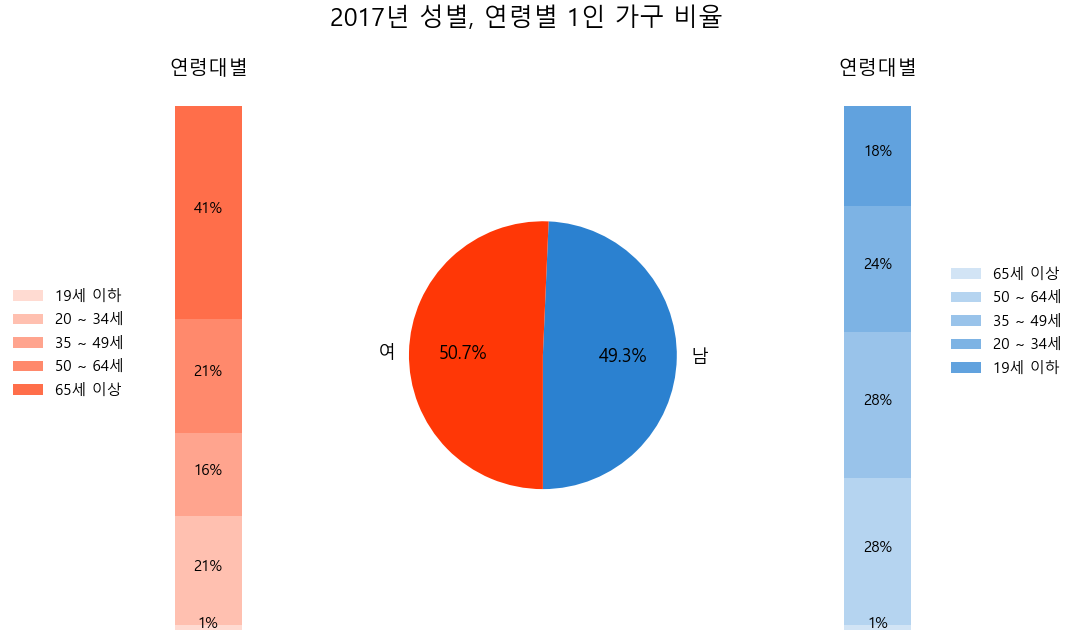

In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig = plt.figure(figsize=(9*2, 5.0625*2))    # 전체 그래프 사이즈 
ax1 = fig.add_subplot(132)                   # 1행 3열의 2번째 그래프 라는 뜻
ax2 = fig.add_subplot(133)
ax3 = fig.add_subplot(131)

fig.subplots_adjust(wspace=0)                # 서브플롯들 사이 간격

# pie chart parameters
ratios = y2017_sum_wm         # 2017년 남녀 1인 가구 수 데이터를 넣어줌. 이 때, pie 내부에서 알아서 % 변환
labels = ['남', '여']
#explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -90
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels , colors = ['#2b81d0' , '#ff3706'] , textprops={'fontsize': 18})

# subplot에서 title 사용하기위해서는 suptitle을 사용해야 하는 듯(추정)
plt.suptitle(t = '2017년 성별, 연령별 1인 가구 비율' , fontsize = 25)

# bar chart parameters
# man
# ratios : 2021년 남자 1인 가구 연령별 비율 데이터

xpos = 0
bottom = 0
ratios = y2017_age_m_percent
width = .2
colors = ['#d2e4f5', '#b5d4f0', '#99c3ea' ,'#7db3e4', '#61a2de']

# for 문으로 막대 그래프를 여러개 그려 중첩 시킵니다.
# xpos는 for 문 내부에서 생성되는 막대 그래프 모두 같아야 합니다. - 중첩을 시키기 위해서입니다.
# height는 막대 그래프의 길이 : 데이터 값 입니다.
# width는 막대 그래프의 두께입니다.
# bottom은 그래프를 중첩시켜줍니다. : y축을 어디서부터 그릴지 y축 값을 잡아준다고 생각하면 됩니다.
# color 색상

# ax2.text ax2 그래프에 text를 넣어줍니다. 비슷한 녀석으로 textbox()가 존재합니다.
# ypos text(수치 표시)의 기입 위치를 알려줍니다.
# ypos = bottom + ax2.patches[j].get_height() / 2 의 뜻은 
# bottom : 막대그래프가 그려질 y 위치 + (ax2.patches[j] 'j'번째로 그려진 막대그래프의 .get_height() : 길이) / 2 입니다.
# 즉 , 스택 형식으로  그려지는 각 막대그래프의 y축 중심 좌표를 구한 것입니다.


for j in range(len(ratios)):
    height = ratios[j]                                             # data 2021년 연령별 남자 1인 가구 비율 값
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center' , fontsize = 15)

# set_title 해당 막대그래프에 기입할 타이틀입니다.
# legend() - legend_age : 범례에 출력할 칼럼입니다. bbox_to_anchor : 세부적인 loc입니다. frameon = False : 배경 투명도입니다. T/F

ax2.set_title('연령대별' , fontsize = 20)
ax2.legend(list(reversed(legend_age)) , fontsize = 15 , loc = (0 , 0) , bbox_to_anchor=(0.7, 0.45, 0, 0) , frameon = False)

# axis('off') : 그래프의 axis를 삭제합니다. axis란 그래프에 그려지는 눈금, x,y축 등을 말합니다.
# 부분별로 삭제하고 싶을 경우 plt.gca().spines['left'].set_visible(False) 를 사용하면 되고
# 'left' 'right' 'top' 'bottom' 등이 사용가능하다고 합니다.
# https://frhyme.github.io/python-lib/plt_axis_off/

# ax2.set_xlim x축의 범위를 설정합니다.(축 제한)
# subplot에서는 xlim 사용시 오류가 납니다.(이유 : ?)

ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

# woman

xpos = 0
bottom = 0
ratios = y2017_age_w_percent
width = .2
colors = ['#ffdbd2', '#ffc0b0', '#ffa48e' ,'#ff896c', '#ff6e4a']

for j in range(len(ratios)):
    height = ratios[j]
    ax3.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax3.patches[j].get_height() / 2
    bottom += height
    ax3.text(xpos, ypos, "%d%%" % (ax3.patches[j].get_height() * 100),
             ha='center' , fontsize = 15)

ax3.set_title('연령대별' , fontsize = 20)
# list(reversed(list))  list의 순서를 뒤집고 list에 값을 넣습니다.
ax3.legend(legend_age , fontsize = 15 , loc = (0 , 0) , bbox_to_anchor=(-0.1, height, 0, 0) , frameon = False)
ax3.axis('off')
ax3.set_xlim(- 2.5 * width, 2.5 * width)

#plt.savefig('gender_age_pie_bar_grap_2017.png')
plt.show()

### 2021년 성별 및 남녀 연령별 가구 비율

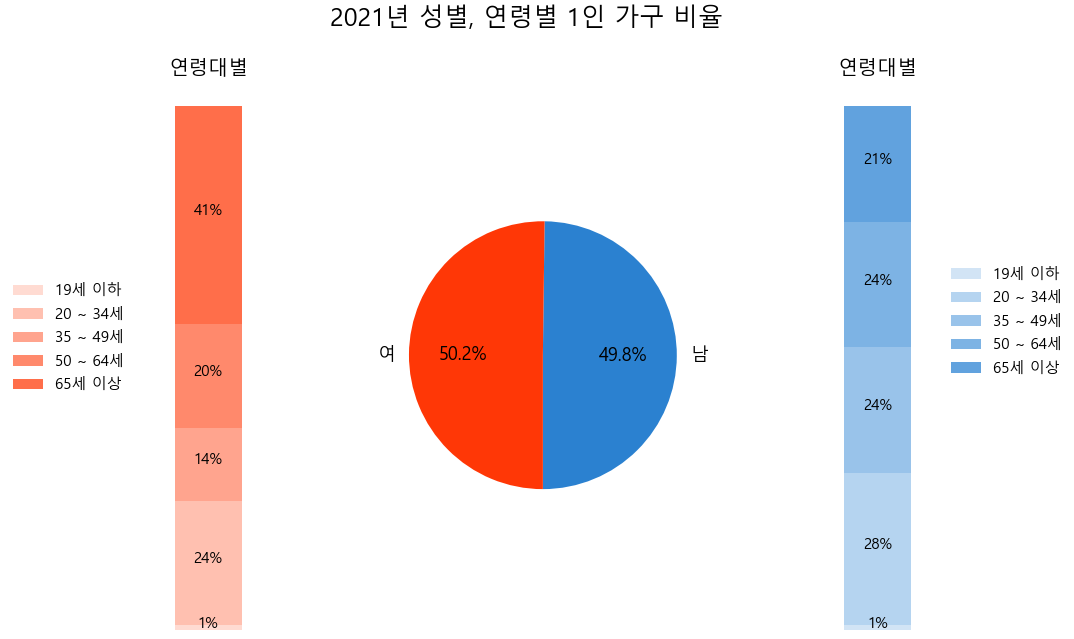

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig = plt.figure(figsize=(9*2, 5.0625*2))
ax1 = fig.add_subplot(132) # 1행 3열의 2번째 그래프 라는 뜻
ax2 = fig.add_subplot(133)
ax3 = fig.add_subplot(131)

fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = y2021_sum_wm
labels = ['남', '여']
#explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -90
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels , colors = ['#2b81d0' , '#ff3706'] , textprops={'fontsize': 18})

plt.suptitle(t = '2021년 성별, 연령별 1인 가구 비율' , fontsize = 25)

# bar chart parameters
# man

xpos = 0
bottom = 0
ratios = y2021_age_m_percent
width = .2
colors = ['#d2e4f5', '#b5d4f0', '#99c3ea' ,'#7db3e4', '#61a2de']

for j in range(len(ratios)):
    height = ratios[j]                                             # data 2021년 연령별 남자 1인 가구 비율 값
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center' , fontsize = 15)

ax2.set_title('연령대별' , fontsize = 20)
ax2.legend(legend_age , fontsize = 15 , loc = (0 , 0) , bbox_to_anchor=(0.7, 0.45, 0, 0) , frameon = False)
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# woman

xpos = 0
bottom = 0
ratios = y2021_age_w_percent
width = .2
colors = ['#ffdbd2', '#ffc0b0', '#ffa48e' ,'#ff896c', '#ff6e4a']

for j in range(len(ratios)):
    height = ratios[j]
    ax3.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax3.patches[j].get_height() / 2
    bottom += height
    ax3.text(xpos, ypos, "%d%%" % (ax3.patches[j].get_height() * 100),
             ha='center' , fontsize = 15)

ax3.set_title('연령대별' , fontsize = 20)
ax3.legend(legend_age , fontsize = 15 , loc = (0 , 0) , bbox_to_anchor=(-0.1, height, 0, 0) , frameon = False)
ax3.axis('off')
ax3.set_xlim(- 2.5 * width, 2.5 * width)

plt.savefig('project_02_ppt_03.png')
plt.show()